Basic Statistics:
               view        likes     comments  reel_length
count     29.000000    29.000000    29.000000    29.000000
mean   14254.965517  3896.896552   814.620690    43.413793
std    15198.589661  3151.914230   650.212021    17.465307
min      955.000000    28.000000     4.000000    11.000000
25%     2715.000000   666.000000   230.000000    30.000000
50%     7890.000000  3497.000000   637.000000    40.000000
75%    20075.000000  6521.000000  1178.000000    56.000000
max    47963.000000  9831.000000  2111.000000    79.000000

Content Domain Distribution:
content_domain
Comedy             4
Travel             4
Food               3
comedy             2
Educational        2
education          1
beautiful          1
sad                1
celebration        1
animation          1
devotional         1
traditinal wear    1
fashion            1
friendship         1
travel             1
Fashion            1
Tech               1
tech               1
Name: count, dtype: int64


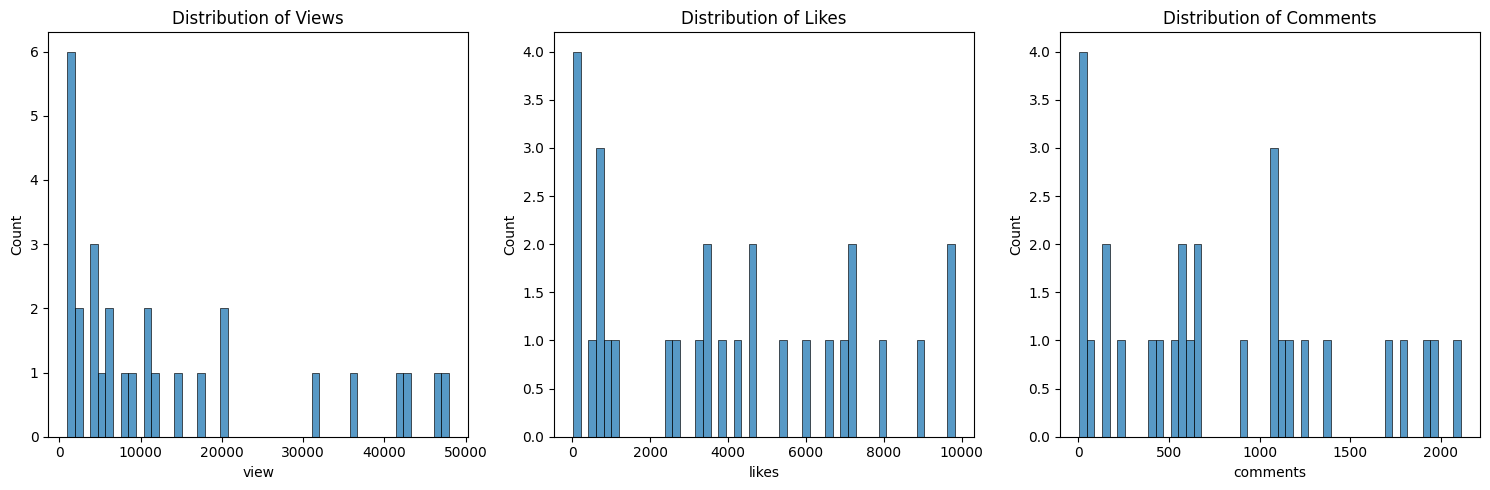

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob
import openpyxl # Import openpyxl for engine

def load_data(file_path):
    """Load Instagram Reels data from an Excel file."""
    # Specify the engine explicitly
    return pd.read_excel(file_path, engine='openpyxl')

def preprocess_data(df):
    """Ensure correct data types and handle missing values."""
    df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce')
    df['view'] = pd.to_numeric(df['view'], errors='coerce').fillna(0).astype(int)
    df['likes'] = pd.to_numeric(df['likes'], errors='coerce').fillna(0).astype(int)
    df['comments'] = pd.to_numeric(df['comments'], errors='coerce').fillna(0).astype(int)
    df['reel_length'] = pd.to_numeric(df['reel_length'], errors='coerce').fillna(0)
    df['comment_text'] = df['comment_text'].fillna('')
    return df

def perform_eda(df):
    """Perform exploratory data analysis and sentiment analysis."""
    print("Basic Statistics:")
    print(df[['view', 'likes', 'comments', 'reel_length']].describe())

    print("\nContent Domain Distribution:")
    print(df['content_domain'].value_counts())

    correlation_matrix = df[['view', 'likes', 'comments', 'reel_length']].corr()

    def get_sentiment(text):
        return TextBlob(text).sentiment.polarity

    df['sentiment_score'] = df['comment_text'].apply(get_sentiment)

    df['sentiment_category'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))

    daily_engagement = df.groupby('upload_date')[['view', 'likes', 'comments']].mean()

    return {
        'correlation_matrix': correlation_matrix,
        'daily_engagement': daily_engagement,
        'sentiment_scores': df['sentiment_category'].value_counts()
    }

def create_visualizations(df):
    """Generate visualizations for Instagram Reels data."""
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    sns.histplot(data=df, x='view', bins=50)
    plt.title('Distribution of Views')

    plt.subplot(132)
    sns.histplot(data=df, x='likes', bins=50)
    plt.title('Distribution of Likes')

    plt.subplot(133)
    sns.histplot(data=df, x='comments', bins=50)
    plt.title('Distribution of Comments')

    plt.tight_layout()
    plt.show()

    fig = px.scatter(df, x='view', y='likes', color='content_domain',
                     hover_data=['reel_id', 'comments'],
                     title='Views vs Likes by Content Domain')
    fig.show()

def main(file_path):
    df = load_data(file_path)
    df = preprocess_data(df)
    analysis_results = perform_eda(df)
    create_visualizations(df)
    return analysis_results

# Install openpyxl if not already installed
!pip install openpyxl

analysis_results = main("insta dataset (2).xlsx")

<ipython-input-4-08bb516871b4>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




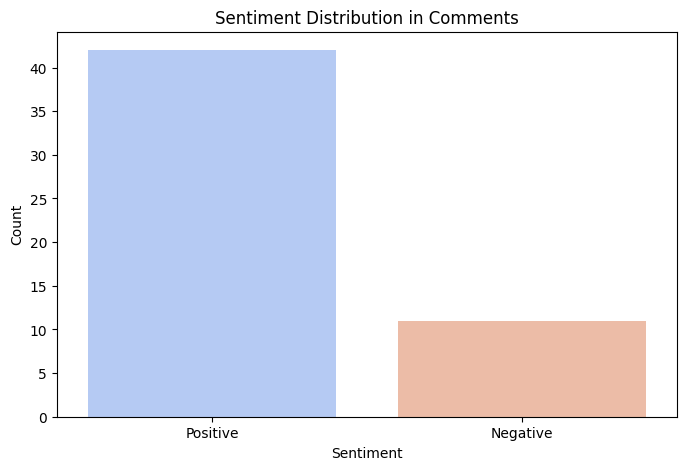

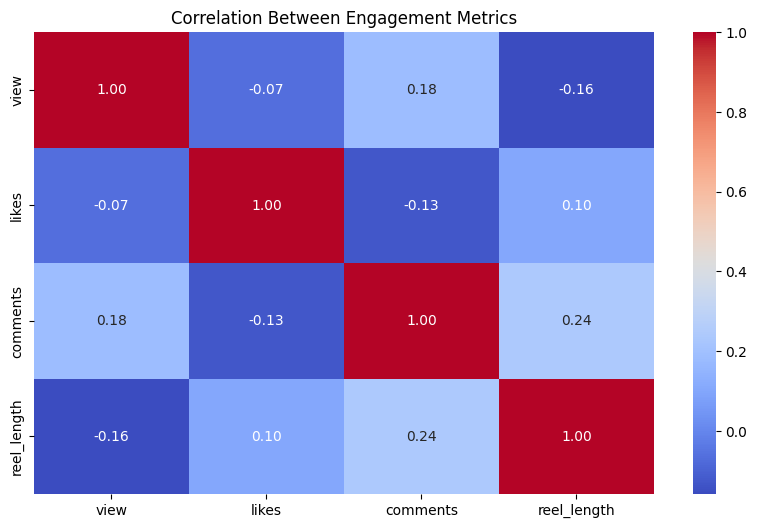

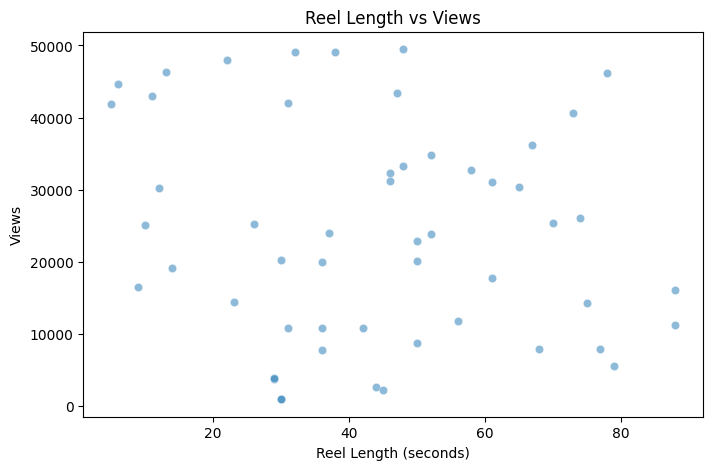

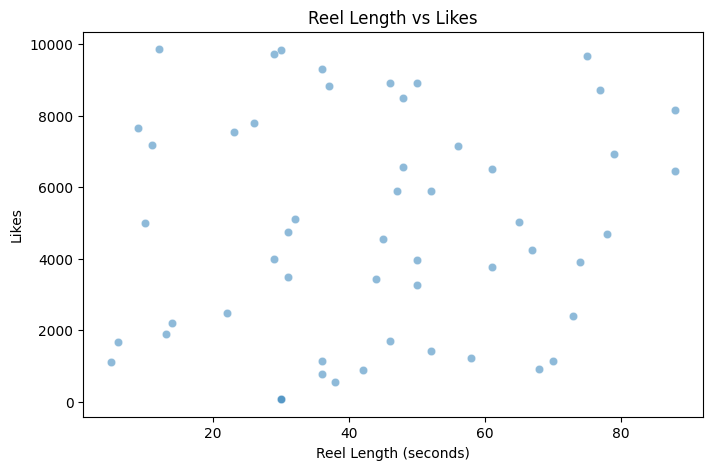

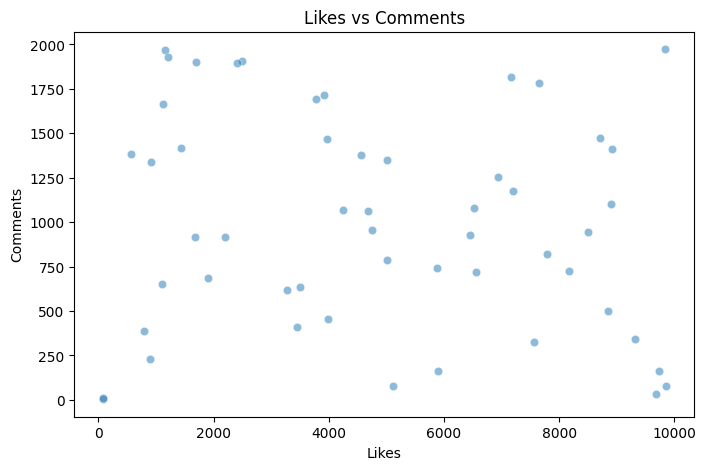

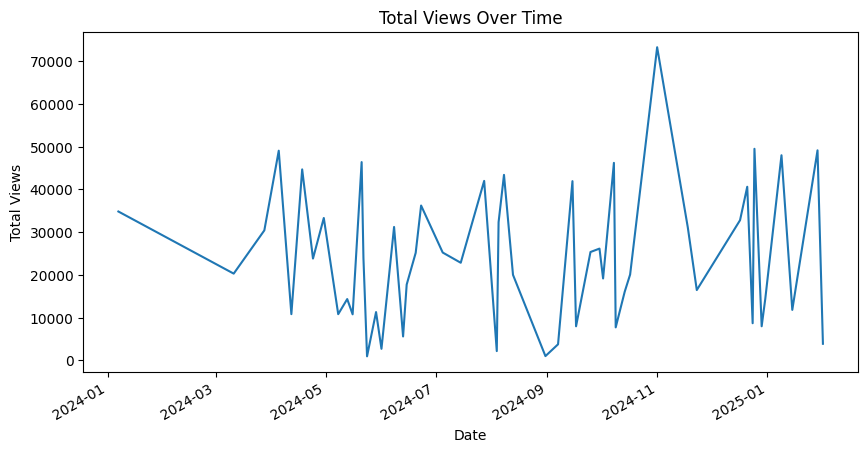

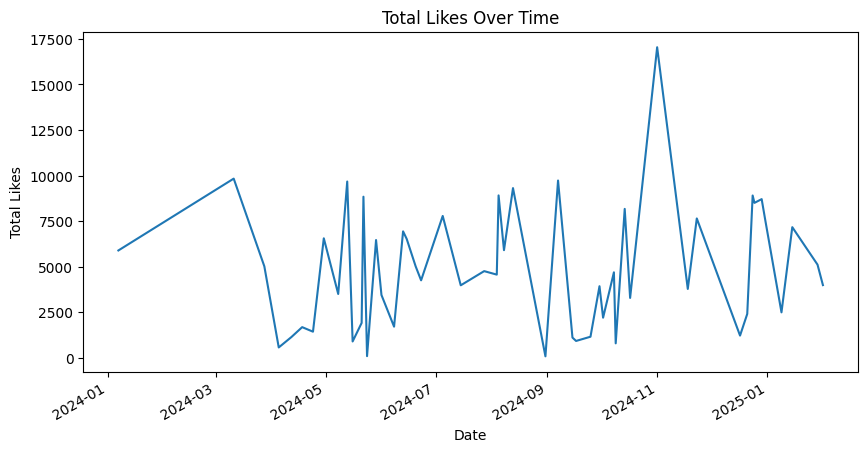

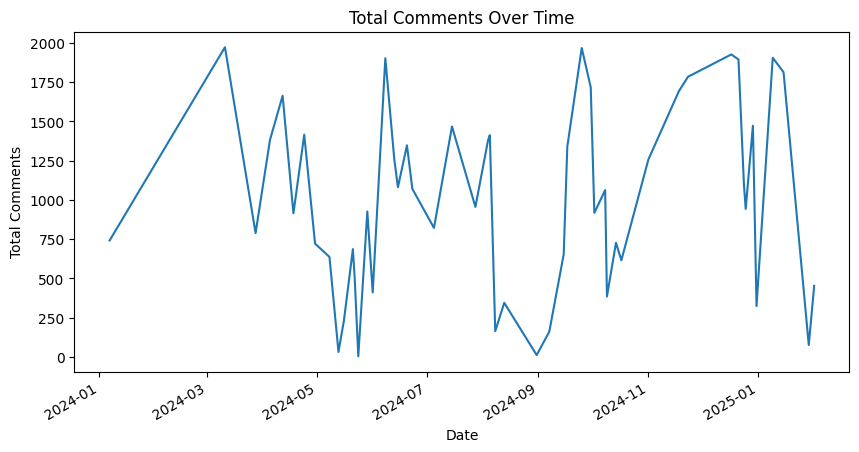

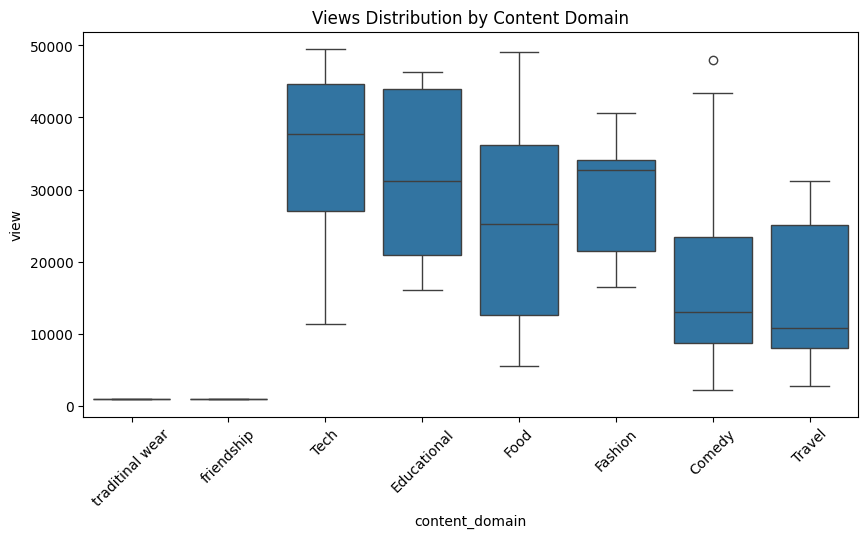

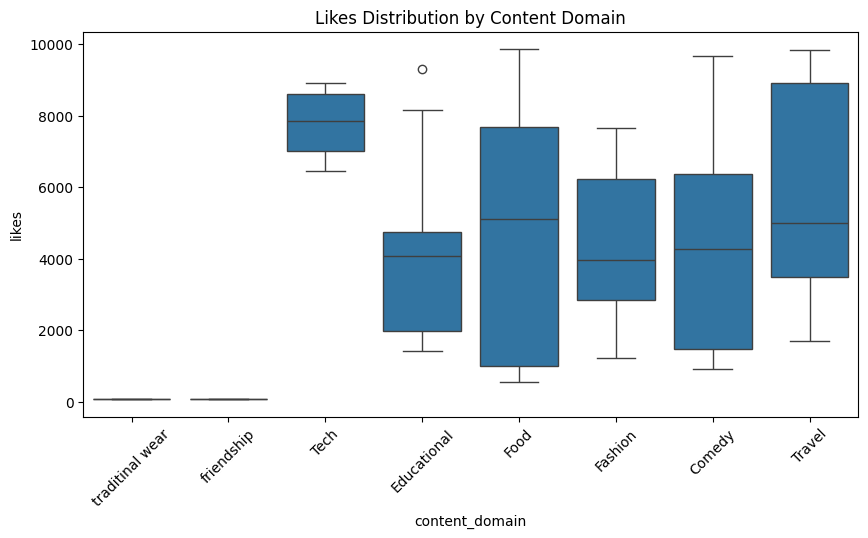

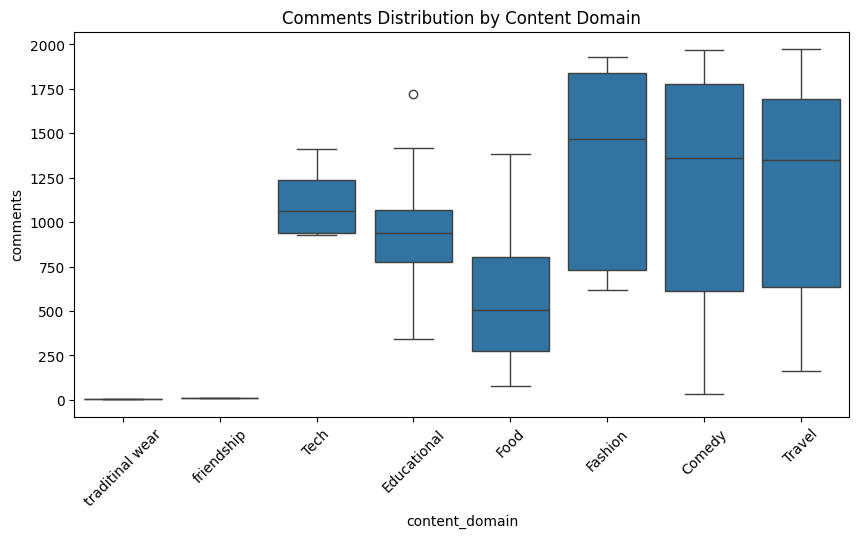

Dataset loaded and analysis started.


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from textblob import TextBlob

# Load dataset from Excel
df = pd.read_excel("insta dataset (1).xlsx")  # Change filename accordingly
df.describe()
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Ensure text is string
    return "Positive" if analysis.sentiment.polarity > 0 else "Negative"

df["sentiment"] = df["comment_text"].apply(get_sentiment)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="sentiment", palette="coolwarm")
plt.title("Sentiment Distribution in Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Correlation Analysis
correlation_matrix = df[["view", "likes", "comments", "reel_length"]].corr()

# Visualization - Views vs Likes
fig = px.scatter(df, x="view", y="likes", color="content_domain", title="Views vs Likes by Content Domain")
fig.show()


# Investigate Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Engagement Metrics")
plt.show()

# Relationship Between Reel Length and Views/Likes
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="reel_length", y="view", alpha=0.5)
plt.title("Reel Length vs Views")
plt.xlabel("Reel Length (seconds)")
plt.ylabel("Views")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="reel_length", y="likes", alpha=0.5)
plt.title("Reel Length vs Likes")
plt.xlabel("Reel Length (seconds)")
plt.ylabel("Likes")
plt.show()

# Relationship Between Likes and Comments
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="likes", y="comments", alpha=0.5)
plt.title("Likes vs Comments")
plt.xlabel("Likes")
plt.ylabel("Comments")
plt.show()

# Time Series Analysis
plt.figure(figsize=(10, 5))
df.groupby("upload_date")["view"].sum().plot(title="Total Views Over Time")
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.show()

plt.figure(figsize=(10, 5))
df.groupby("upload_date")["likes"].sum().plot(title="Total Likes Over Time")
plt.xlabel("Date")
plt.ylabel("Total Likes")
plt.show()

plt.figure(figsize=(10, 5))
df.groupby("upload_date")["comments"].sum().plot(title="Total Comments Over Time")
plt.xlabel("Date")
plt.ylabel("Total Comments")
plt.show()

# Content Domain Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="content_domain", y="view")
plt.title("Views Distribution by Content Domain")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="content_domain", y="likes")
plt.title("Likes Distribution by Content Domain")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="content_domain", y="comments")
plt.title("Comments Distribution by Content Domain")
plt.xticks(rotation=45)
plt.show()

print("Dataset loaded and analysis started.")